Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
%precision 16
import numpy
from scipy.special import erf, fresnel
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Numerical  Quadrature 

## Question 1 - Basic  Quadrature Rules

The Error Function $\mathrm{erf}(x)$ is defined by the definite integral

$$
    \mathrm{erf}(x) = \frac{2}{\pi}\int_0^x e^{-t^2}dt
$$ 

We will use this function to test and understand the different errors associated with a range of both single interval and extended quadrature rules.  

Use the function definitions below to write a set of functions for approximating 
$$
 I[f] =  \int_a^b f(x) dx
$$ 
which we will use for testing against $\mathrm{erf}(x)$

**(a)** [8] Single step quadrature rules

Write short python functions for calculating $I[f]$ for the following newton-Cotes  quadrature rules on a single interval

* Left-Rectangle rule
* Mid-point rule
* Trapezoidal rule
* Simpson's Rule

In [3]:
def I_left(f, a, b):
    """ Left rectangle rule"""
    # YOUR CODE HERE
    return f(a)*(b-a)
    
def I_midpoint(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    # YOUR CODE HERE
    h = (b+a)/2
    return f(h)*(b-a)
    
def I_trapezoid(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    # YOUR CODE HERE
    h = b-a
    return (h/2)*(f(a)+f(b)) 
    
def I_simpson(f, a, b):
    """ Newton-Cotes Simpsons rule"""
    # YOUR CODE HERE
    h = (b-a)/2
    return (h/3)*(f(a)+4*f(a+h)+f(b))
    

In [4]:
# test against erf(1.)

x = 1.0
I_true = erf(x)
print('x = {}, erf(x) = {}\n'.format(x,I_true))
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = numpy.zeros(4)
I[0] = I_left(f, 0., x)
I[1] = I_midpoint(f, 0., x)
I[2] = I_trapezoid(f, 0., x)
I[3] = I_simpson(f, 0., x)

err = numpy.abs( I - I_true)/numpy.abs(I_true)
answer = numpy.array([0.339003328982087,  0.0428168411464673,
          0.084202437312641, 0.0004770816600977])
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148

success!


**(b)** [8] Repeat the exercise for  3 point Gauss-Legendre Quadrature

* First:  calculate the weights $w_i$, using the method of undetermined coefficients such that the quadrature rule exactly integrates the monomials $1, x, x^2$ over the interval $x\in[-1,1]$.
(hint:  the 3 quadrature points $x_i$ are the roots of 

$$
    P_3(x) = (5x^3 - 3x)/2
$$
and this rule will exactly integrate polynomials up to order 5).

YOUR ANSWER HERE
$$
    P_3(x) = (5x^3 - 3x)/2
$$
$$
    P_3(x) = x(5x^2 - 3)/2
$$
$$
    P_3(x) = x(5x^2 - 3)/2 = 0
$$

$P_3(x) = 0$ for $x_0 = 0$, $x_1 = \sqrt \frac{3}{5}$, $x_2 = -\sqrt \frac{3}{5}$


* 3 point Gauss-Legendre Quadrature over the interval $x\in[-1,1]$

Consider $N=3$ on $x \in [-1,1]$

$$I_2[f] = w_0 f(x_0) + w_1 f(x_1) + w_2 f(x_2)$$

Let $$I[f] = \int_{-1}^{1} f(x)dx \quad\text{and}\quad I_2[f] = w_0 f(x_0) + w_1 f(x_1)$$

Then
$$\begin{aligned}
    &I[1] &=  \int^{1}_{-1} 1 dx = 2 & & I_3[1] &= w_0 + w_1 + w_2\\
    &I[x] &=  \int^{1}_{-1} x dx = 0 & & I_3[x] &= w_0 x_0 + w_1 x_1 + w_2 x_2\\
    &I[x^2] &=  \int^{1}_{-1} x^2 dx = \frac{2}{3} & & I_3[x^2] &= w_0 x_0^2 + w_1 x_1^2 + w_2 x_2^2\\
    &I[x^3] &=  \int^{1}_{-1} x^3 dx = 0 & & I_3[x^3] &= w_0 x_0^3 + w_1 x_1^3 + w_2 x_2^3\\
    &I[x^4] &=  \int^{1}_{-1} x^4 dx = \frac{2}{5} & & I_3[x^4] &= w_0 x_0^4 + w_1 x_1^4 + w_2 x_2^4\\
    &I[x^5] &=  \int^{1}_{-1} x^5 dx = 0 & & I_3[x^5] &= w_0 x_0^5 + w_1 x_1^5 + w_2 x_2^5\\
\end{aligned}$$

$$\begin{aligned}
w_0 + w_1 + w_2 = 2 \\ 
w_0 x_0 + w_1 x_1 + w_2 x_2 = 0 \\
w_0 x_0^2 + w_1 x_1^2 + w_2 x_2^2 = \frac{2}{3}\\
w_0 x_0^3 + w_1 x_1^3 + w_2 x_2^3 = 0\\
w_0 x_0^4 + w_1 x_1^4 + w_2 x_2^4 = \frac{2}{5}\\
w_0 x_0^5 + w_1 x_1^5 + w_2 x_2^5 = 0\\
\end{aligned}$$


3 quadrature points $x_i$ are the roots of $P_3(x) = 0$ $x_0 = 0$, $x_1 = \sqrt \frac{3}{5}$, $x_2 = -\sqrt \frac{3}{5}$

$$\begin{aligned}
w_0 + w_1 + w_2 = 2 \\ 
w_0 x_0^2 + w_1 x_1^2 + w_2 x_2^2 = \frac{2}{3}, & &  \frac{3}{5} (w_1 + w_2)  = \frac{2}{3}, & & w_1 + w_2 = \frac{10}{9}\\
w_0 + w_1 + w_2 = 2 & & w_1 + w_2 = \frac{10}{9}, & & w_0 = \frac{8}{9} \\
w_0 x_0 + w_1 x_1 + w_2 x_2 = 0 & & w_1 x_1 + w_2 x_2 = 0, & & \sqrt \frac{3}{5}w_1 +  -\sqrt \frac{3}{5}w_2 = 0 \\ 
w_1 = w_2 && w_1 + w_2 = \frac{10}{9}, & & 2 w_1 =  \frac{10}{9}, & & w_1 = w_2 =  \frac{5}{9}\\ 
\end{aligned}$$
3 point Gauss-Legendre Quadrature over the interval $x\in[-1,1]$
* $w_0 = \frac{8}{9}$,  $w_1 =  \frac{5}{9}$,  $w_2 =  \frac{5}{9}$
* $x_0 = 0$, $x_1 = \sqrt \frac{3}{5}$, $x_2 = -\sqrt \frac{3}{5}$

Next, implement your 3-point GL quadrature scheme to approximate 

$$
    \int_a^b f(x) dx
$$
for an arbitrary interval $x\in [a,b]$ (remember the affine mapping). 

In [5]:
def I_GL3(f, a, b):
    """ 3 point Gauss-Legendre Quadrature rule"""
    # YOUR CODE HERE
    w0 = 8/9
    w1 = 5/9
    w2 = 5/9
    p0 = 0
    p1 = numpy.sqrt(3/5)
    p2 = -numpy.sqrt(3/5)
    alpha = (b-a)/2
    beta = (a+b)/2
    return alpha*(w0*f(p0*alpha + beta) + w1*f(p1*alpha + beta) + w2*f(p2*alpha + beta))

In [6]:
x = 1.0
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = I_GL3(f, 0., x)
err = numpy.abs( I - I_true)/numpy.abs(I_true)
print('x = {}, erf(x) = {}'.format(x,I_true))
print('       I_GL3(x) = {}, err={}\n'.format(I,err))

answer = 1.2785635535382798e-05
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148
       I_GL3(x) = 0.8426900184845107, err=1.2785635535382798e-05

success!


**(c)** [8] Extended Quadrature rules. 

All of the above rules approximate the integral for a single "panel" over the interval $[a,b]$, but can be extended to calculate the quadrature of $N$ panels that subdivide the interval.  

Write a function that computes

$$
    I_N[f] = \int_a^b f(x) dx = \sum_{n=1}^N I_{method}[f]_n
$$


where $I_{method}[f]_n$ is one of the quadrature methods used above. 

Note, this won't be the most efficient way to implement many of these methods,  but that's not really the issue here.

In [7]:
def quadN(f, a, b, N, method=I_midpoint):
    """ 
    integrate a function f over the interval x in [a,b] using 
    an extended quadrature rule that implements a single interval
    quadrature rule over N panels of width (a - b)/N 
        
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: integer
        number of panels to subdivide [a,b]
    method:  quadrature function with interface I(f, x0, x1) (real)
        returns quadrature approximation for subinterval [x0, x1]
        defaults to a midpoint rule
            
    Returns:
    --------
    I_N:  extended quadrature approximation of \int_a^b f(x) dx
        
    """
    # YOUR CODE HERE
    I_N = 0
    h = (b-a)/N
    for i in range(N):
        a_prime = a + i*h
        b_prime = a + (i+1)*h
        I_N += method(f, a_prime, b_prime)
    return I_N

In [8]:
x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

# set the number of panels in a list
N = [ 2**n for n in range (5)]

# integrate using the extended mid-point scheme and calculate relative errors for each N
err = numpy.zeros(len(N))
for i,n in enumerate(N):
    I = quadN(f, 0., x, n, method=I_midpoint)
    err[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {}, err = {}'.format(n, I, err[i]) )

N = 1, I = 0.8787825789354448, err = 0.042816841146467305
N = 2, I = 0.8514725992856609, err = 0.010409158754012854
N = 4, I = 0.844870665048331, err = 0.00257490216785125
N = 8, I = 0.843241789735697, err = 0.0006419796806984446
N = 16, I = 0.8428359498722815, err = 0.00016038542232009014


In [9]:
# Let's test against erf(1)

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

# set the number of panels in a list
N = [ 2**n for n in range (5)]

# integrate using the extended mid-point scheme and calculate relative errors for each N
err = numpy.zeros(len(N))
for i,n in enumerate(N):
    I = quadN(f, 0., x, n, method=I_midpoint)
    err[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {}, err = {}'.format(n, I, err[i]) )
    
answer = numpy.array([0.0428168411464673, 0.0104091587540129,
                      0.0025749021678512, 0.0006419796806984,
                      0.0001603854223201])
numpy.testing.assert_allclose(answer,err)
print('success!')
                    

N = 1, I = 0.8787825789354448, err = 0.042816841146467305
N = 2, I = 0.8514725992856609, err = 0.010409158754012854
N = 4, I = 0.844870665048331, err = 0.00257490216785125
N = 8, I = 0.843241789735697, err = 0.0006419796806984446
N = 16, I = 0.8428359498722815, err = 0.00016038542232009014
success!


**(d)** [10] Now *write a function* to make a plot that  compares the convergence behavior of all of the above methods (if you make it a function, you will be able to reuse it in the next  problem).

This function should  make a beautiful log-log plot showing the convergence behavior of the *relative error* with respect to 

$$
    I_{true} = \mathrm{erf}(1) = 0.8427007929497148
$$

for all the different quadrature rules for 

$$
    N = 2^n \quad \text{panels}\quad \text{for}\, n=0,1,\ldots,10
$$

remember to label all the curves with the methods.

Hint 1: there are some nice python tricks for doing this relatively efficiently, e.g. you can loop over a list of methods and extract the name with 

`name = method.__name__`


**Extra Credit** the rate of convergence of any scheme can be written as

$$
    |e| = C\Delta x^p
$$

For each method calculate $C$ and $p$ and plot the best fit straight-line in $\log(\Delta x)-\log(e)$ space (hint: `numpy.polyfit` is your friend). 

In [10]:
import pandas 

def plot_quad_convergence(f, a, b, N, I_true, title=None):
    """ create a convergence log-log plot that plots relative error of 
    various extended quadrature schemes vs panel spacing dx
    
    If really fancy, also calculates the best fit straight line in log-log space to estimate convergence
    parameters
    
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: List of integers 
        number of panels to subdivide [a,b]
    I_true:  real
        True solution to compute errors
    title:  string
        title of plot (if not None)
            
    Returns:
    --------
    Nothing but generates a pretty log-log plot all properly labeled
    
    """
    # YOUR CODE HERE
    delta_x = numpy.empty(len(N))
    fig = plt.figure(figsize=(10, 8))
    axes = fig.add_subplot(1, 1, 1)
    error = numpy.empty(len(N))
    methods = [I_left, I_midpoint, I_trapezoid, I_simpson, I_GL3]
    colors = ['r', 'b', 'm', 'y', 'c']
    columns = ['Method', 'p', 'c', 'log c']
    data = []
    for method, color in zip(methods, colors):
        for (i, n) in enumerate(N):
            x_hat = numpy.linspace(a, b, n + 1)
            delta_x[i] = x_hat[1] - x_hat[0]
            I = quadN(f, a, b, n, method=method)
            error[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
        axes.loglog(delta_x, error, 'o-', label=method.__name__)
        # Extra Credit
        if method == I_GL3:
            select_delta_x = numpy.append(delta_x[0:6,], delta_x[9,])
            select_error = numpy.append(error[0:6,], error[9,])
            coeffs = numpy.polyfit(numpy.log(delta_x[0:6,]),numpy.log(error[0:6,]), 1)
            poly = numpy.poly1d(coeffs)
            efit = lambda x: numpy.exp(poly(numpy.log(x)))
            axes.loglog(delta_x, efit(delta_x), color, label=method.__name__ + ' polyfit')
        else:
            coeffs = numpy.polyfit(numpy.log(delta_x),numpy.log(error), 1)
            poly = numpy.poly1d(coeffs)
            efit = lambda x: numpy.exp(poly(numpy.log(x)))
            axes.loglog(delta_x, efit(delta_x), color, label=method.__name__ + ' polyfit')
        data.append([method.__name__, coeffs[0], numpy.exp(coeffs[1]), coeffs[1]])
    axes.set_xlabel('$\Delta x$',fontsize=10)
    axes.set_ylabel('Relative Error')
    axes.set_title(title)
    axes.legend()
    axes.grid()
    
    plt.show()
    print("Extra Credit:")
#     pandas.set_option('display.precision', 16)
    coeff_table = pandas.DataFrame(data, columns=columns)
    display(coeff_table)
         
    

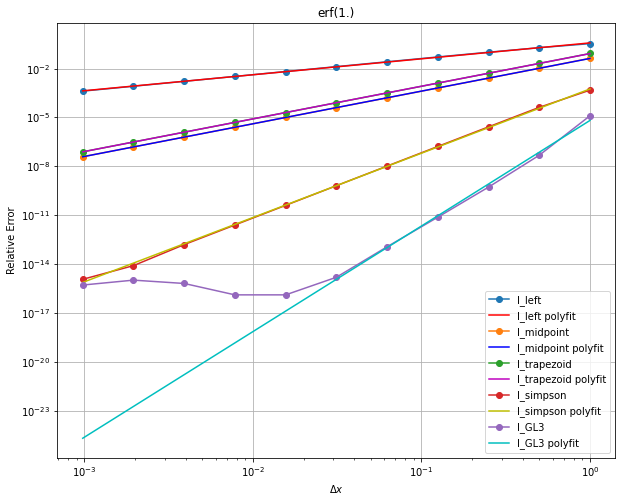

Extra Credit:


,Method,p,c,log c
0,I_left,0.977430,0.376590,-0.976599
1,I_midpoint,2.003679,0.041808,-3.174667
2,I_trapezoid,2.002184,0.082995,-2.488971
3,I_simpson,3.943094,0.000565,-7.479071
4,I_GL3,6.475881,0.000007,-11.928262


In [11]:
#Let's test with erf(1) and a lot of points

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)    

N = [ 2**n for n in range (11)]

plot_quad_convergence(f, 0., 1., N, I_true, 'erf(1.)')

Rate of convergence of any scheme:
* I_left: p = 0.977430, Rate of convergence = 1
* I_midpoint: p = 2.003679, Rate of convergence = 2
* I_trapezoid: p = 0.977430, Rate of convergence = 1
* I_simpson: p = 0.977430, Rate of convergence = 1
* I_GL3: p = 0.977430, Rate of convergence = 1

**(e)** [3] Estimate the number of function evaluations required to get a relative error $e \approx 10^{-7}$ i.e. about 7 digits of precision for the schemes

* Mid-point
* Simpson's
* 3-Pt GL quadrature


In [12]:
def plot_quad_convergence_1(f, a, b, N, I_true, title=None):
    """ create a convergence log-log plot that plots relative error of 
    various extended quadrature schemes vs panel spacing dx
    
    If really fancy, also calculates the best fit straight line in log-log space to estimate convergence
    parameters
    
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: List of integers 
        number of panels to subdivide [a,b]
    I_true:  real
        True solution to compute errors
    title:  string
        title of plot (if not None)
            
    Returns:
    --------
    Nothing but generates a pretty log-log plot all properly labeled
    
    """
    # YOUR CODE HERE
    delta_x = numpy.empty(len(N))
    fig = plt.figure(figsize=(10, 8))
    axes = fig.add_subplot(1, 1, 1)
    error = numpy.empty(len(N))
    methods = [I_left, I_midpoint, I_trapezoid, I_simpson, I_GL3]
    colors = ['r', 'b', 'm', 'y', 'c']
    columns = ['Method', 'Error', 'N']
    data = []
    for method, color in zip(methods, colors):
        for (i, n) in enumerate(N):
            I = quadN(f, a, b, n, method=method)
            error[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
            data.append([method.__name__, error[i], n])
        axes.semilogy(N, error, 'o-', label=method.__name__)
    axes.set_xlabel('$N$',fontsize=10)
    axes.set_ylabel('Relative Error')
    axes.set_title(title)
    axes.legend()
    axes.grid()
    
    plt.show()
    print("Error Analysis:")
#     pandas.set_option('display.precision', 16)
    error_table = pandas.DataFrame(data, columns=columns)
    selected_errors = error_table[error_table['Method'].isin(['I_midpoint', 
                                              'I_simpson', 'I_GL3'])].sort_values(by=['Method', 'Error'])
    display(selected_errors)

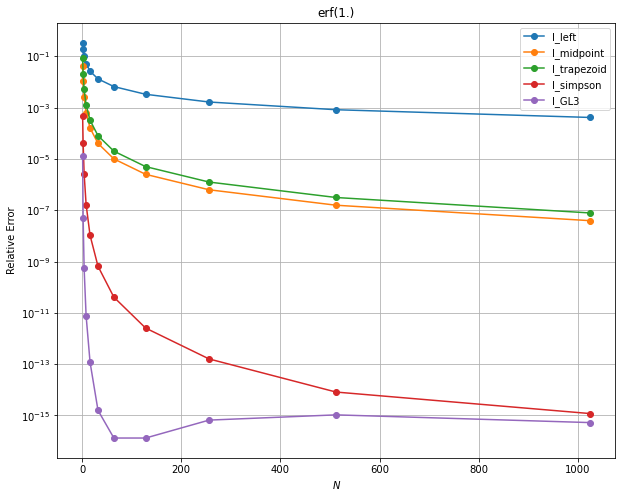

Error Analysis:


,Method,Error,N
50,I_GL3,1.317458e-16,64
51,I_GL3,1.317458e-16,128
54,I_GL3,5.269833e-16,1024
52,I_GL3,6.587291e-16,256
53,I_GL3,1.053967e-15,512
49,I_GL3,1.580950e-15,32
48,I_GL3,1.172538e-13,16
47,I_GL3,7.688817e-12,8
46,I_GL3,5.384832e-10,4
45,I_GL3,4.835216e-08,2


In [13]:
x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)    

N = [ 2**n for n in range (11)]

plot_quad_convergence_1(f, 0., 1., N, I_true, 'erf(1.)')

YOUR ANSWER HERE 
1. The number of function evaluations required to get a relative error $e \approx 10^{-7}$
* Mid-point: 
$2^8 = 256$, Relative Error $= 6.263634e-07$
Number of function evaluations = 256
* Simpson's: $2^3 = 8$, $N = 3$, Relative Error $= 1.668710e-07$
Number of function evaluations = 8
* 3-Pt GL quadrature: $2^1 = 2$, $N = 1$, Relative Error $= 4.835216e-08$
Number of function evaluations = 2


## Question 2

Let's repeat the problem with a harder integral.

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.


**(a)** [2] Where do you imagine the problematic points of the integrals will be?

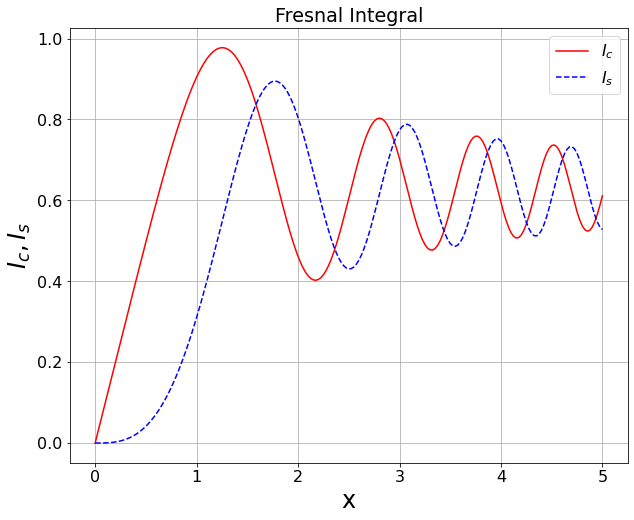

In [14]:
from scipy.special import fresnel
x = numpy.linspace(0, 5, 201)
I_s, I_c = fresnel(x / numpy.sqrt(numpy.pi / 2))
scaled_I_s = numpy.sqrt(numpy.pi / 2) * I_s
scaled_I_c = numpy.sqrt(numpy.pi / 2) * I_c
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = '16'
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, scaled_I_c, 'r-', label='$I_{c}$')
axes.plot(x, scaled_I_s, 'b--', label='$I_{s}$')
axes.set_xlabel('x',fontsize=24)
axes.set_ylabel('$I_{c}, I_{s}$', fontsize=24)
axes.set_title('Fresnal Integral')
axes.legend()
axes.grid()
plt.show()

YOUR ANSWER HERE

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx$$

Integration by parts:
$$
u = \frac{1}{\sqrt x}, \ \ du = - \frac{1}{2\sqrt{x^3}} dx, \ \ dv = \cos x dx, \ \ v = \sin x
$$

$$
I_c = \int^1_0 \frac{\cos x}{\sqrt{x}}
$$

$$
I_c = \int^1_0 u dv
$$

$$
I_c = \left. uv \right|_0^1 - \int^1_0 v du
$$

$$
I_c = \left.\frac{\sin x}{\sqrt x}\right|_0^1 - \int^1_0 \sin x (- \frac{1}{2\sqrt{x^3}}) dx
$$

$$
I_c = \left.\frac{\sin x}{\sqrt x}\right|_0^1 + \frac{1}{2}\int^1_0 \frac{\sin x}{\sqrt{x^3}} dx
$$

$$
I_s = \int^1_0 \frac{\sin x}{\sqrt{x}}
$$

$$
I_s = - \left.\frac{\cos x}{\sqrt x}\right|_0^1 - \frac{1}{2}\int^1_0 \frac{\cos x}{\sqrt{x^3}} dx
$$


* The problematic points of the integrals will be at 0 where function is not defined. Thus, quadrature rule such as left rectangle, trapezoid, simpson will fail.

**(b)** [4] Use your convergence plotting routine to make  2 plots showing convergence behavior for all the extended quadrature rules for $I_c$ and $I_s$ 

In [15]:
# Set the True solutions for reference
Is_true, Ic_true = fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

In [16]:
import pandas 

def plot_quad_convergence_3(f, a, b, N, I_true, title=None):
    """ create a convergence log-log plot that plots relative error of 
    various extended quadrature schemes vs panel spacing dx
    
    If really fancy, also calculates the best fit straight line in log-log space to estimate convergence
    parameters
    
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: List of integers 
        number of panels to subdivide [a,b]
    I_true:  real
        True solution to compute errors
    title:  string
        title of plot (if not None)
            
    Returns:
    --------
    Nothing but generates a pretty log-log plot all properly labeled
    
    """
    # YOUR CODE HERE
    delta_x = numpy.empty(len(N))
    fig = plt.figure(figsize=(10, 8))
    axes = fig.add_subplot(1, 1, 1)
    error = numpy.empty(len(N))
    methods = [I_left, I_midpoint, I_trapezoid, I_simpson, I_GL3]
    colors = ['r', 'b', 'm', 'y', 'c']
    columns = ['Method', 'Error', 'N']
    for method, color in zip(methods, colors):
        for (i, n) in enumerate(N):
            x_hat = numpy.linspace(a, b, n + 1)
            delta_x[i] = x_hat[1] - x_hat[0]
            I = quadN(f, a, b, n, method=method)
            error[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
        axes.loglog(delta_x, error, 'o-', label=method.__name__)
    axes.set_xlabel('$\Delta x$',fontsize=10)
    axes.set_ylabel('Relative Error')
    axes.set_title(title)
    axes.legend()
    axes.grid()
    
    plt.show()

<ipython-input-17-50092f39042d>:2: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x : numpy.cos(x) / numpy.sqrt(x)
<ipython-input-17-50092f39042d>:2: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x : numpy.cos(x) / numpy.sqrt(x)
<ipython-input-17-50092f39042d>:2: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x : numpy.cos(x) / numpy.sqrt(x)


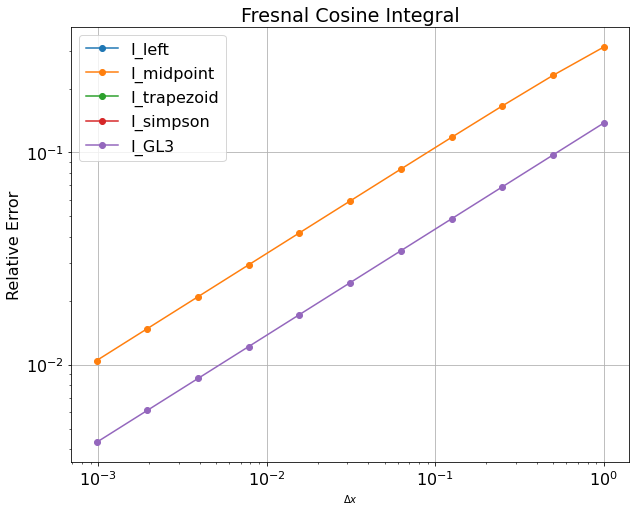

<ipython-input-17-50092f39042d>:3: RuntimeWarning: invalid value encountered in double_scalars
  g = lambda x : numpy.sin(x) / numpy.sqrt(x)
<ipython-input-17-50092f39042d>:3: RuntimeWarning: invalid value encountered in double_scalars
  g = lambda x : numpy.sin(x) / numpy.sqrt(x)
<ipython-input-17-50092f39042d>:3: RuntimeWarning: invalid value encountered in double_scalars
  g = lambda x : numpy.sin(x) / numpy.sqrt(x)


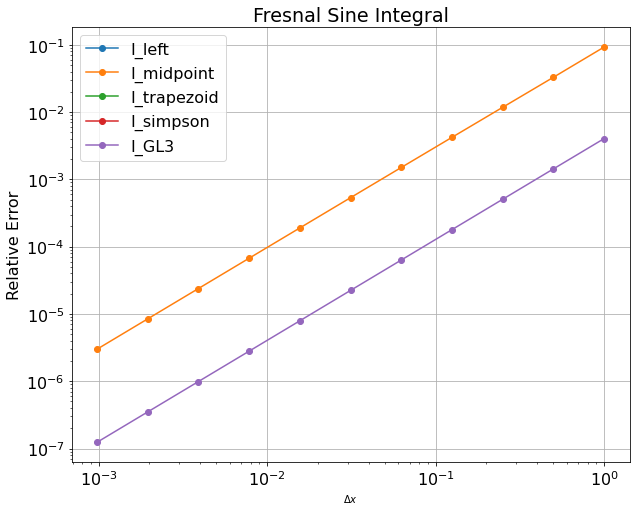

In [17]:
# YOUR CODE HERE
f = lambda x : numpy.cos(x) / numpy.sqrt(x)    
g = lambda x : numpy.sin(x) / numpy.sqrt(x) 

N = [ 2**n for n in range (11)]

plot_quad_convergence_3(f, 0., 1., N, Ic_true, 'Fresnal Cosine Integral')
plot_quad_convergence_3(g, 0., 1., N, Is_true, 'Fresnal Sine Integral')

**(c)**  [4] Explain the results of your plots

In [18]:
import pandas 

def get_error_table(f, a, b, N, I_true, title=None):
    delta_x = numpy.empty(len(N))
    error = numpy.empty(len(N))
    methods = [I_left, I_midpoint, I_trapezoid, I_simpson, I_GL3]
    colors = ['r', 'b', 'm', 'y', 'c']
    columns = ['Method', 'Error', 'N']
    data = []
    for method, color in zip(methods, colors):
        for (i, n) in enumerate(N):
            x_hat = numpy.linspace(a, b, n + 1)
            delta_x[i] = x_hat[1] - x_hat[0]
            I = quadN(f, a, b, n, method=method)
            error[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
            data.append([method.__name__, error[i], n])
    print("Error Analysis:")
    pandas.set_option('display.precision', 16)
    error_table = pandas.DataFrame(data, columns=columns)
    select_table = error_table[error_table['Method'].isin(['I_midpoint', 'I_GL3'])]
    display(select_table.sort_values(by=['Method', 'Error']))
#     display(select_table[select_table['Error'].min()])

In [19]:
# YOUR CODE HERE
f = lambda x : numpy.cos(x) / numpy.sqrt(x)    
g = lambda x : numpy.sin(x) / numpy.sqrt(x) 
x = 1.
I_true = erf(x)
e = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x) 

N = [ 2**n for n in range (11)]
# get_error_table(e, 0., 1., N, I_true, 'erf(1.)')
get_error_table(f, 0., 1., N, Ic_true, 'Fresnal Cosine Integral')
get_error_table(g, 0., 1., N, Is_true, 'Fresnal Sine Integral')

Error Analysis:


<ipython-input-19-e1a24506d3c3>:2: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x : numpy.cos(x) / numpy.sqrt(x)


,Method,Error,N
54,I_GL3,0.0043037807420691,1024
53,I_GL3,0.0060864650883440,512
52,I_GL3,0.0086075614376667,256
51,I_GL3,0.0121729299137871,128
50,I_GL3,0.0172151213881472,64
49,I_GL3,0.0243458514148373,32
48,I_GL3,0.0344301951876215,16
47,I_GL3,0.0486914336315782,8
46,I_GL3,0.0688588666194560,4
45,I_GL3,0.0973741763336080,2


Error Analysis:


<ipython-input-19-e1a24506d3c3>:3: RuntimeWarning: invalid value encountered in double_scalars
  g = lambda x : numpy.sin(x) / numpy.sqrt(x)


,Method,Error,N
54,I_GL3,0.0000001236329465,1024
53,I_GL3,0.0000003496867790,512
52,I_GL3,0.0000009890635415,256
51,I_GL3,0.0000027974938091,128
50,I_GL3,0.0000079125035038,64
49,I_GL3,0.0000223798957712,32
48,I_GL3,0.0000632994090902,16
47,I_GL3,0.0001790321602822,8
46,I_GL3,0.0005063157390723,4
45,I_GL3,0.0014313409600627,2


YOUR ANSWER HERE

$$
I_c = \int^1_0 \frac{\cos x}{\sqrt{x}}
$$

$$
I_c = \left.\frac{\sin x}{\sqrt x}\right|_0^1 + \frac{1}{2}\int^1_0 \frac{\sin x}{\sqrt{x^3}} dx
$$

$$
I_s = \int^1_0 \frac{\sin x}{\sqrt{x}}
$$

$$
I_s = - \left.\frac{\cos x}{\sqrt x}\right|_0^1 - \frac{1}{2}\int^1_0 \frac{\cos x}{\sqrt{x^3}} dx
$$

* Fresnel Integral are transcendental function which doe not satisfy  polynomial equation, hence, not expressible as a finite combination of the algebraic operations of addition, subtraction, multiplication, division, raising to a power, and extracting a root.

* Thus, quadrature rule such as left rectangle, trapezoid, simpson failed as these rule use value of function at $x = 0$ which is not defined.

* The midpoint and 3 points Gauss-Legendre Quadrature rule did not fail for Fresnel Integral. The error for these two are higher than erf function for same number of panels. Thus, the absence of closed-form solution of Fresnel Integral of the underlying function is the cause of higher error.

* For 3 points Gauss-Legendre Quadrature error = 5.269833e-16 for N = 1024, erf(𝑥)
* For 3 points Gauss-Legendre Quadrature error = 0.0043037807420691 for N = 1024, $I_{c}$
* For 3 points Gauss-Legendre Quadrature error = 0.0000001236329465 when N = 1024, $I_{s}$

* For midpoint error = 3.914768e-08 for N = 1024, erf(𝑥)
* For midpoint = 0.0104491609447675 for N = 1024, $I_{c}$
* For midpoint = 0.0000029867978312 when N = 1024, $I_{s}$

**(d)** [4] show that the convergence and the quadrature schemes can be dramatically improved simply by tranforming the variable $x$ with $x=t^2$

1. Show analytically what the transformed integral should be
2. produce two more plots demonstrating convergence behaviour
3. comment on the results

In [20]:
import pandas 

def get_error_table(f, a, b, N, I_true, title=None):
    delta_x = numpy.empty(len(N))
    error = numpy.empty(len(N))
    methods = [I_left, I_midpoint, I_trapezoid, I_simpson, I_GL3]
    colors = ['r', 'b', 'm', 'y', 'c']
    columns = ['Method', 'Error', 'N']
    data = []
    for method, color in zip(methods, colors):
        for (i, n) in enumerate(N):
            x_hat = numpy.linspace(a, b, n + 1)
            delta_x[i] = x_hat[1] - x_hat[0]
            I = quadN(f, a, b, n, method=method)
            error[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
            data.append([method.__name__, error[i], n])
    print("Error Analysis:")
    pandas.set_option('display.precision', 16)
    error_table = pandas.DataFrame(data, columns=columns)
#     select_table = error_table[error_table['Method'].isin(['I_midpoint', 'I_GL3'])]
#     display(select_table.sort_values(by=['Method', 'Error']))
    display(error_table.sort_values(by=['Error']))

YOUR ANSWER HERE

$$
I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx
$$

$$
x = t^2  \ and \ t = \sqrt x 
$$

$$
dt = \frac{1}{2\sqrt x } dx
$$

$$
I_c = 2\int^1_0 \frac{\cos x}{2\sqrt{x}} dx = 2\int^1_0 \cos t^2 dt
$$

$$
I_s = 2\int^1_0 \frac{\sin x}{2\sqrt{x}} dx = 2\int^1_0 \sin t^2 dt
$$

$$
\cos t = 1 - \frac{t^2}{2!} + \frac{t^4}{4!} - \frac{t^6}{6!} ....
$$

$$
\cos t^2 = 1 - \frac{(t^2)^2}{2!} + \frac{(t^2)^4}{4!} - \frac{(t^2)^6}{6!} ....
$$

$$
\cos t^2 = \sum_{n=0}^\infty (-1^n) \frac{(t)^{4n}}{(2n)!}
$$

$$
\sin t^2 = t^2 - \frac{(t^2)^3}{2!} + \frac{(t^2)^5}{4!} - \frac{(t^2)^7}{6!} ....
$$

$$
\sin t^2 = \sum_{n=0}^\infty (-1^n) \frac{(t)^{4n+2}}{(2n+1)!}
$$

$$
I_c = 2\int^1_0 \sum_{n=0}^\infty (-1^n) \frac{(t)^{4n}}{(2n)!} dt = \sum_{n=0}^\infty (-1^n) \frac{2}{(2n)!}  \int^1_0 (t)^{4n} dt
$$

$$
I_c = \left. \sum_{n=0}^\infty (-1^n) \frac{2}{(2n)!} \frac{(t)^{4n + 1}}{4n + 1}\right|_0^1
$$

$$
I_c = \sum_{n=0}^\infty (-1^n) \frac{2}{(2n)!} \frac{1}{4n + 1}
$$

$$
I_s = 2\int^1_0 \sum_{n=0}^\infty (-1^n) \frac{(t)^{4n+2}}{(2n+1)!} dt =  \sum_{n=0}^\infty (-1^n) \frac{2}{(2n+1)!}  \int^1_0 (t)^{4n+2} dt
$$

$$
I_s = \left. \sum_{n=0}^\infty (-1^n) \frac{2}{(2n+1)!} \frac{(t)^{4n + 3}}{4n + 3}\right|_0^1
$$

$$
I_s = \sum_{n=0}^\infty (-1^n) \frac{2}{(2n + 1)!} \frac{1}{4n + 3}
$$

Transformed Integral is:
* $I_c = 2\int^1_0 \cos t^2 dt = \sum_{n=0}^\infty (-1^n) \frac{2}{(2n)!} \frac{1}{4n + 1}$
* $I_s = 2\int^1_0 \sin t^2 dt = \sum_{n=0}^\infty (-1^n) \frac{2}{(2n + 1)!} \frac{1}{4n + 3}$ 

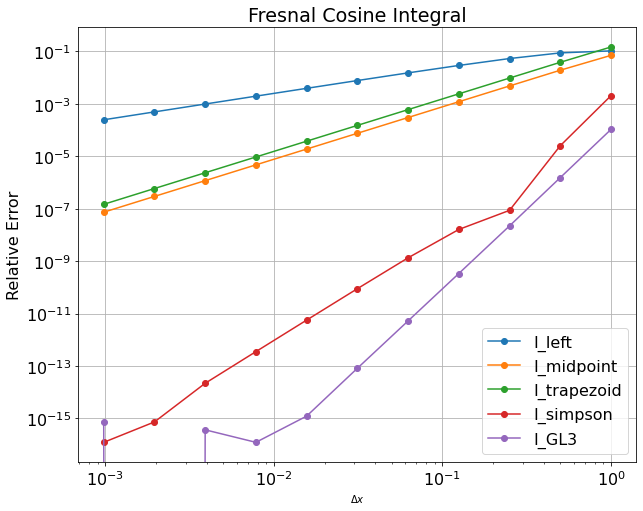

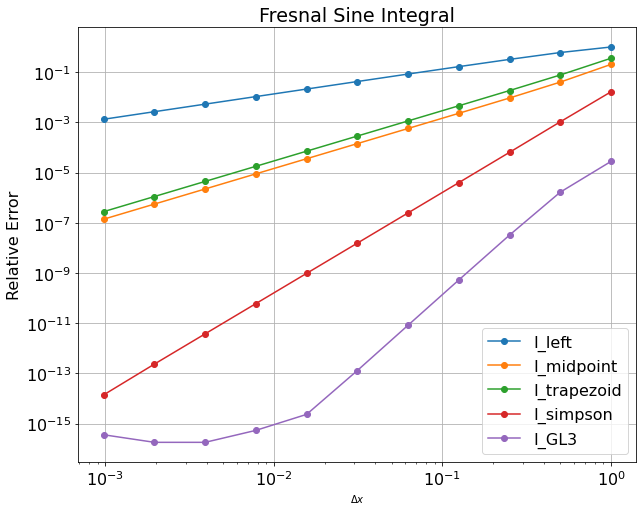

Error Analysis:


,Method,Error,N
53,I_GL3,0.0000000000000000,512
51,I_GL3,0.0000000000000001,128
43,I_simpson,0.0000000000000001,1024
52,I_GL3,0.0000000000000004,256
54,I_GL3,0.0000000000000007,1024
42,I_simpson,0.0000000000000007,512
50,I_GL3,0.0000000000000012,64
41,I_simpson,0.0000000000000220,256
49,I_GL3,0.0000000000000820,32
40,I_simpson,0.0000000000003544,128


Error Analysis:


,Method,Error,N
52,I_GL3,0.0000000000000002,256
53,I_GL3,0.0000000000000002,512
54,I_GL3,0.0000000000000004,1024
51,I_GL3,0.0000000000000005,128
50,I_GL3,0.0000000000000023,64
43,I_simpson,0.0000000000000140,1024
49,I_GL3,0.0000000000001297,32
42,I_simpson,0.0000000000002346,512
41,I_simpson,0.0000000000037574,256
48,I_GL3,0.0000000000082731,16


In [21]:
# YOUR CODE HERE
f = lambda t : 2*numpy.cos(t**2)    
g = lambda t : 2*numpy.sin(t**2) 

N = [ 2**n for n in range (11)]

plot_quad_convergence_3(f, 0., 1., N, Ic_true, 'Fresnal Cosine Integral')
plot_quad_convergence_3(g, 0., 1., N, Is_true, 'Fresnal Sine Integral')
get_error_table(f, 0., 1., N, Ic_true, 'Fresnal Cosine Integral')
get_error_table(g, 0., 1., N, Is_true, 'Fresnal Sine Integral')

YOUR ANSWER HERE

* Fresnel Integral with transformation from x to $t^2$ allows the function to be defined at $x = 0$. Thus, all the quadrature rules works unlike with the Fresnel Intetgral with x as its variable.

$$
I_c = 2\int^1_0 \frac{\cos x}{2\sqrt{x}} dx = 2\int^1_0 \cos t^2 dt = \sum_{n=0}^\infty (-1^n) \frac{2}{(2n)!} \frac{1}{4n + 1}
$$

$$
I_s = 2\int^1_0 \frac{\sin x}{2\sqrt{x}} dx = 2\int^1_0 \sin t^2 dt = \sum_{n=0}^\infty (-1^n) \frac{2}{(2n + 1)!} \frac{1}{4n + 3}
$$

* $I_{c}$ and $I_{s}$ has closed form solution since, these underlying function can be expressed using Taylor series expansion. Hence, it allows better convergence behaviour.

* The best quadrature rule is 3 points Gauss-Legendre Quadrature with error = 1.317458e-16 for N = 64, erf(𝑥)
* The best quadrature rule 3 points Gauss-Legendre Quadrature with error = 0.0043037807420691 for N = 1024, $I_{c}$ with x  as variable.
* The best quadrature rule 3 points Gauss-Legendre Quadrature with error = 0.0000029867978312 when N = 1024, $I_{s}$ with x  as variable.
* The best quadrature rule 3 points Gauss-Legendre Quadrature with error = 0.0000000000000004 for N = 256, $I_{c}$ with $t^2$  as variable.
* The best quadrature rule 3 points Gauss-Legendre Quadrature with error = 0.0000000000000002 when N = 256, $I_{s}$ with $t^2$  as variable.

